In [51]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
from pycaret.classification import *

In [52]:
#import data
body_performance = pd.read_csv('bodyPerformance.csv')

In [53]:
body_performance.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [54]:
body_performance.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [55]:
body_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [56]:
body_performance.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [57]:
for index, row in body_performance.iterrows():
    if (row["age"] > 10.0 and row['age'] <= 20.0):
       body_performance.loc[index,"Grouped Age"] = '10-20'
    if (row["age"] > 20.0 and row['age'] <= 30.0):
       body_performance.loc[index,"Grouped Age"] = '20-30'
    if (row["age"] > 30.0 and row['age'] <= 40.0):
       body_performance.loc[index,"Grouped Age"] = '30-40'
    if (row["age"] > 40.0 and row['age'] <= 50.0):
       body_performance.loc[index,"Grouped Age"] = '40-50'
    if (row["age"] > 50.0 and row['age'] <= 60.0):
       body_performance.loc[index,"Grouped Age"] = '50-60'
    if (row["age"] > 60.0 and row['age'] <= 70.0):
       body_performance.loc[index,"Grouped Age"] = '60-70'

In [58]:
body_performance.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,Grouped Age
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,20-30
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,20-30
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,30-40
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,30-40
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,20-30


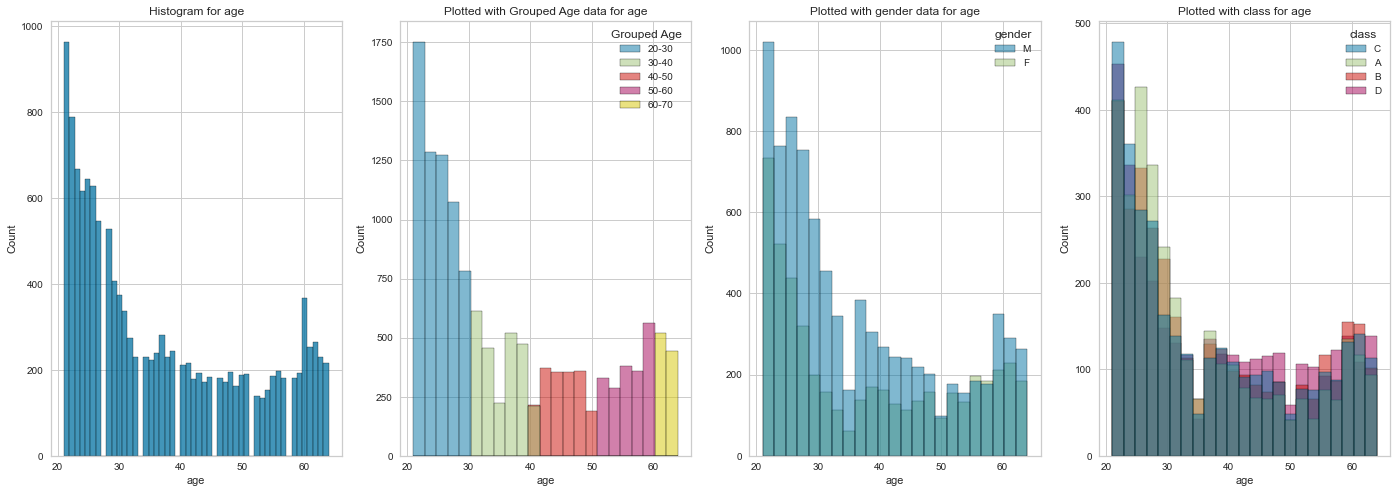

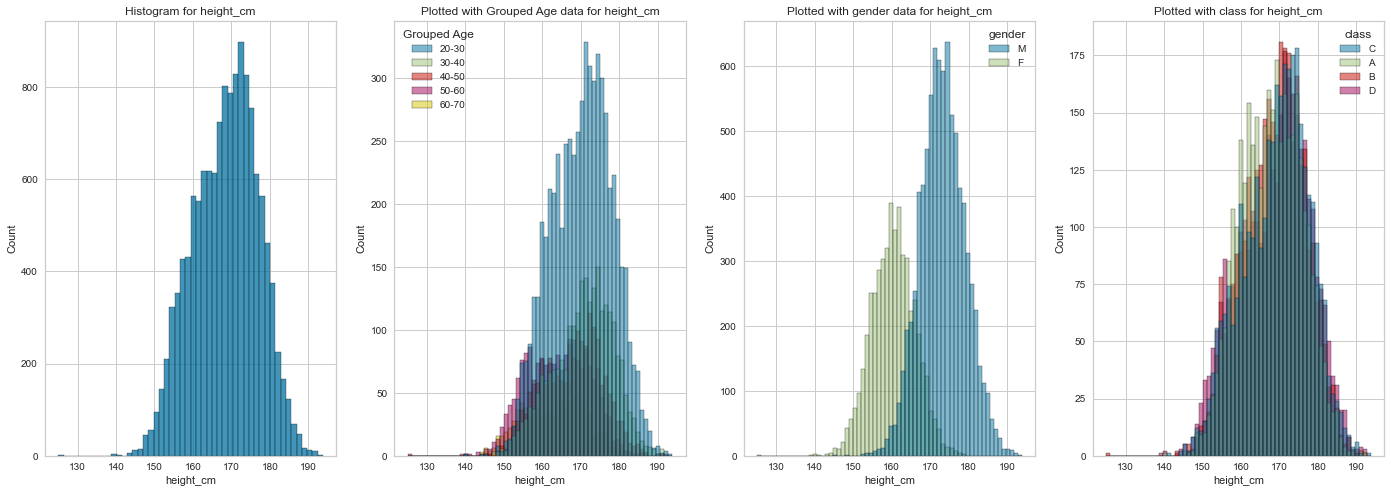

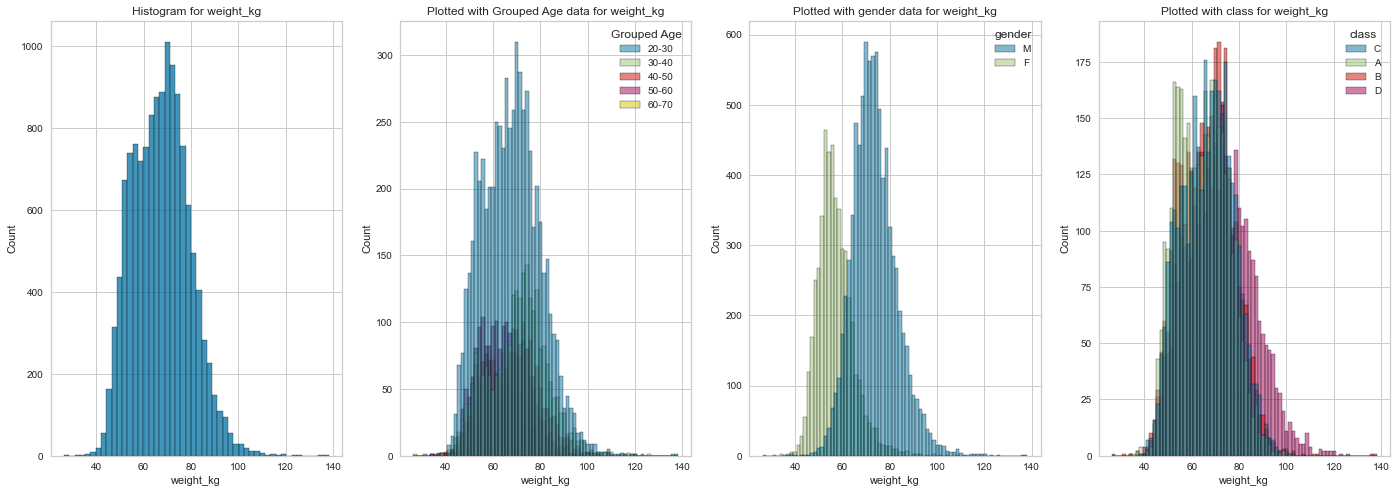

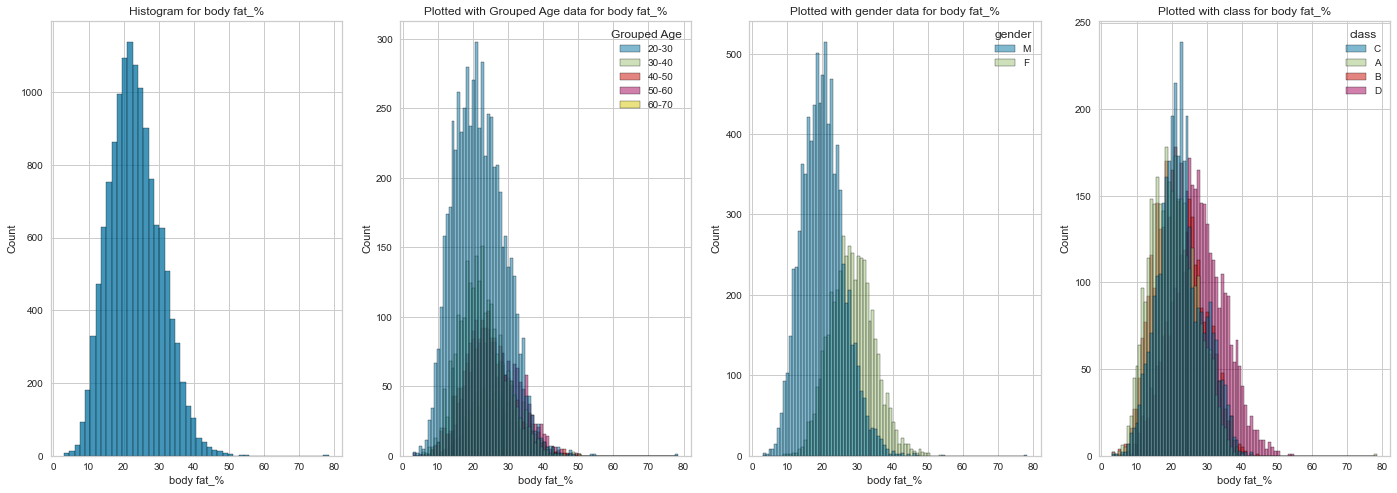

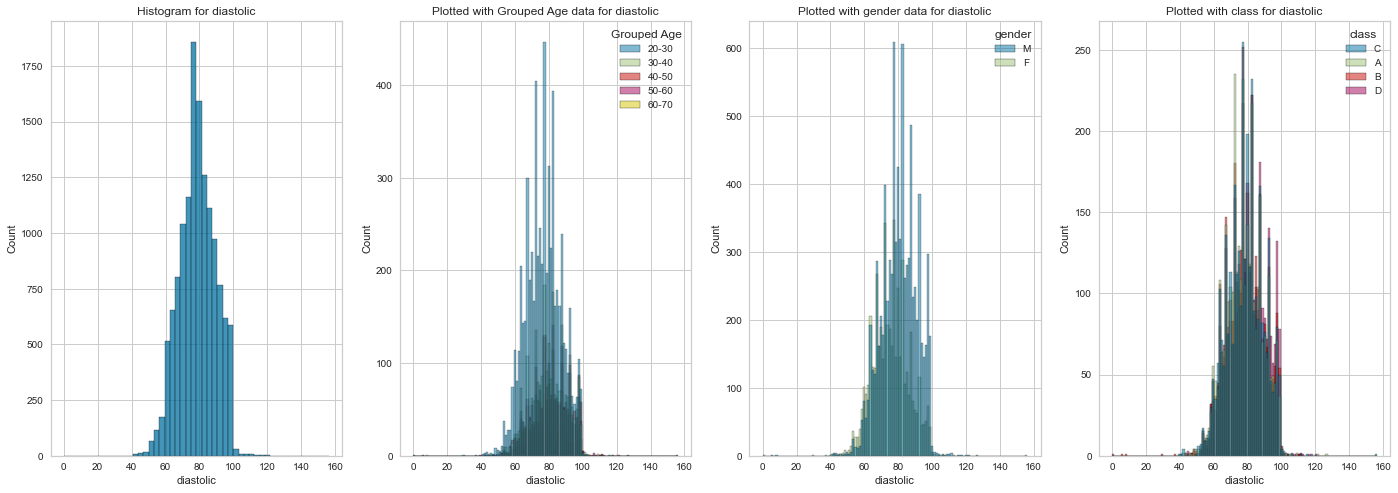

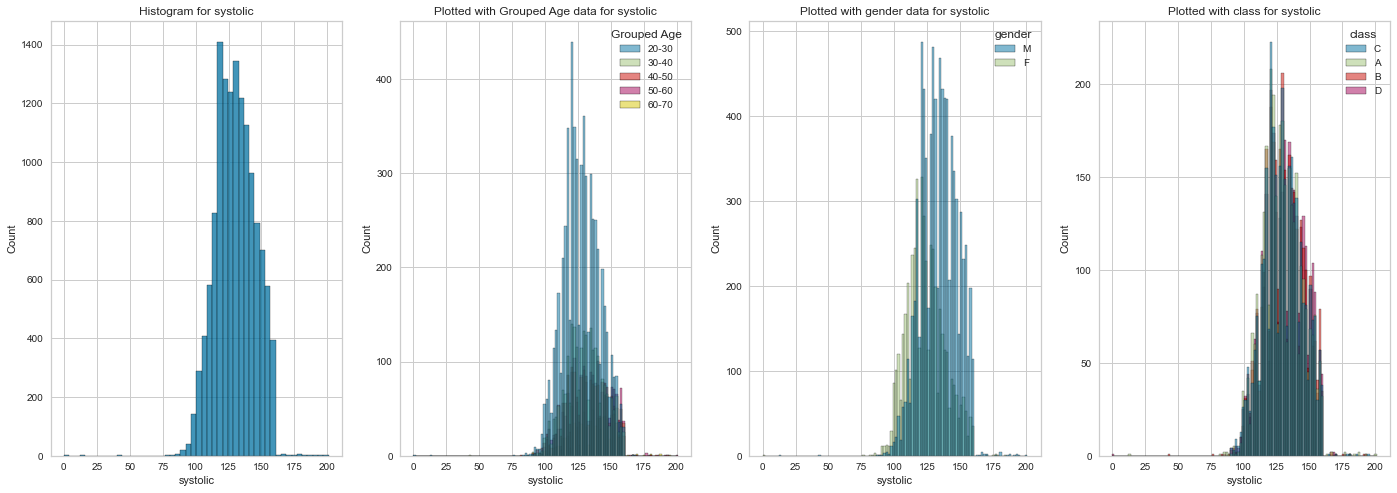

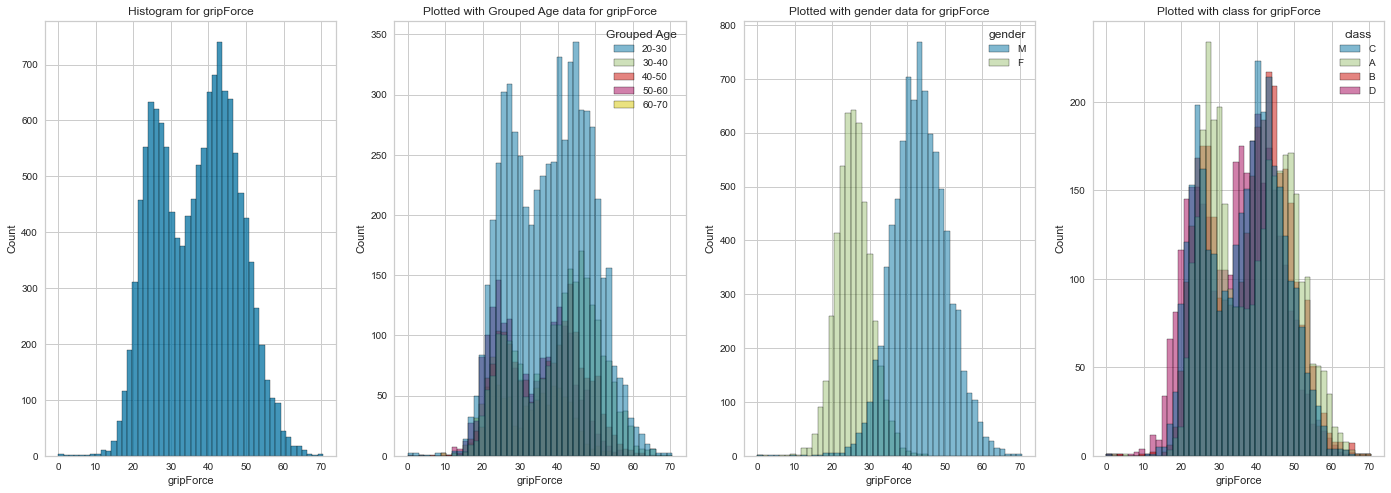

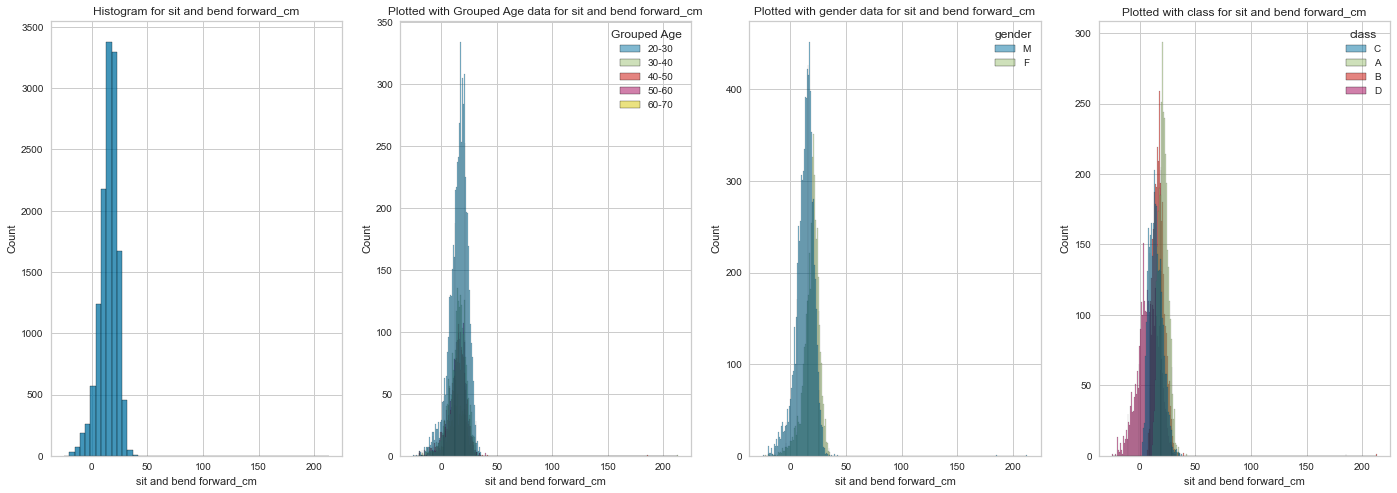

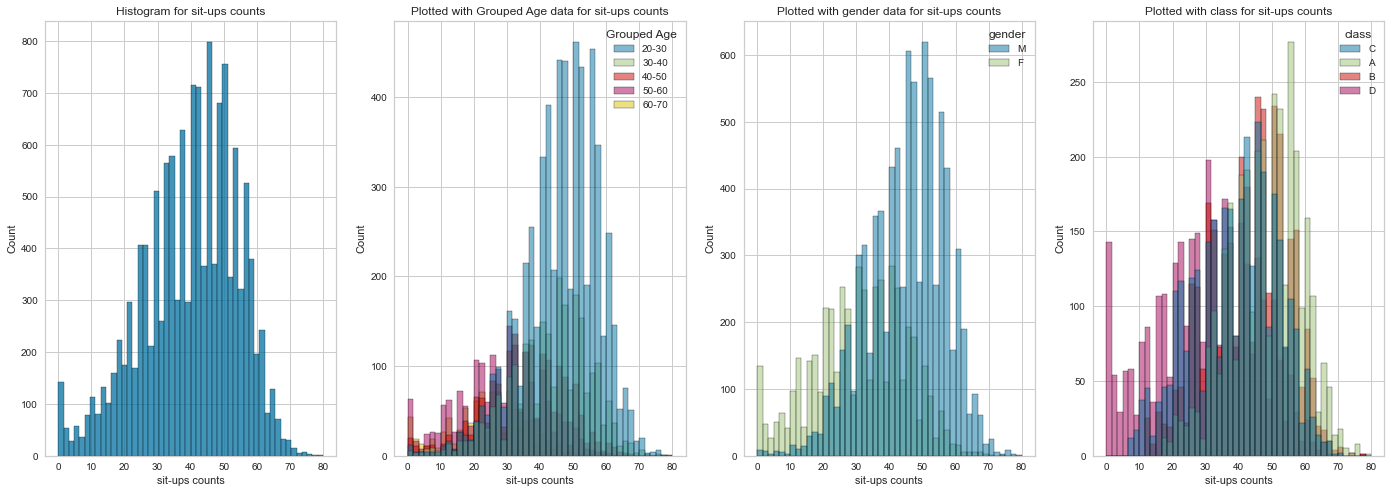

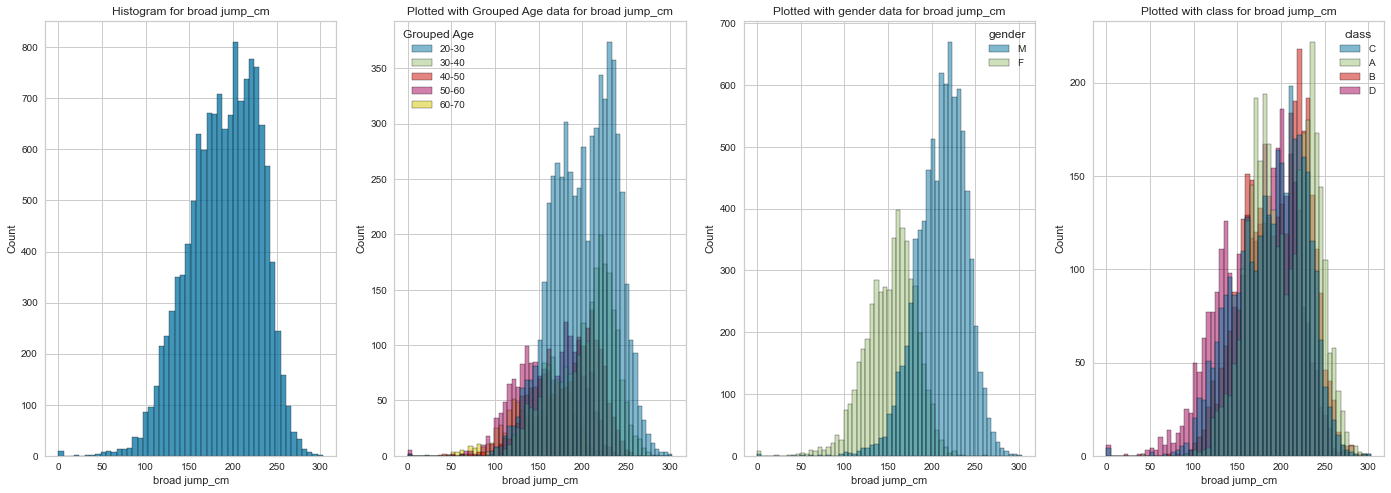

In [59]:
numerical = list(body_performance.select_dtypes(include='number').columns)

for var in numerical:
    fig, ax = plt.subplots(1, 4, figsize=(24, 8))
    sns.histplot(x=var, bins=50, data=body_performance ,ax=ax[0])
    ax[0].set_title(f"Histogram for {var}")
    
    sns.histplot(x=var, hue='Grouped Age', data=body_performance, ax=ax[1], alpha=0.5)  
    ax[1].set_title(f"Plotted with Grouped Age data for {var}")
    
    sns.histplot(x=var, hue='gender', data=body_performance, ax=ax[2], alpha=0.5)  
    ax[2].set_title(f"Plotted with gender data for {var}")
    
    sns.histplot(x=var, hue='class', data=body_performance, ax=ax[3], alpha=0.5)  
    ax[3].set_title(f"Plotted with class for {var}")

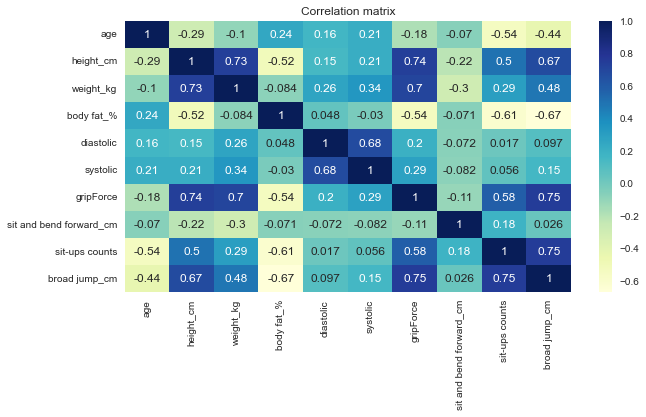

In [60]:
plt.figure(figsize=(10, 5))
sns.heatmap(body_performance.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation matrix");

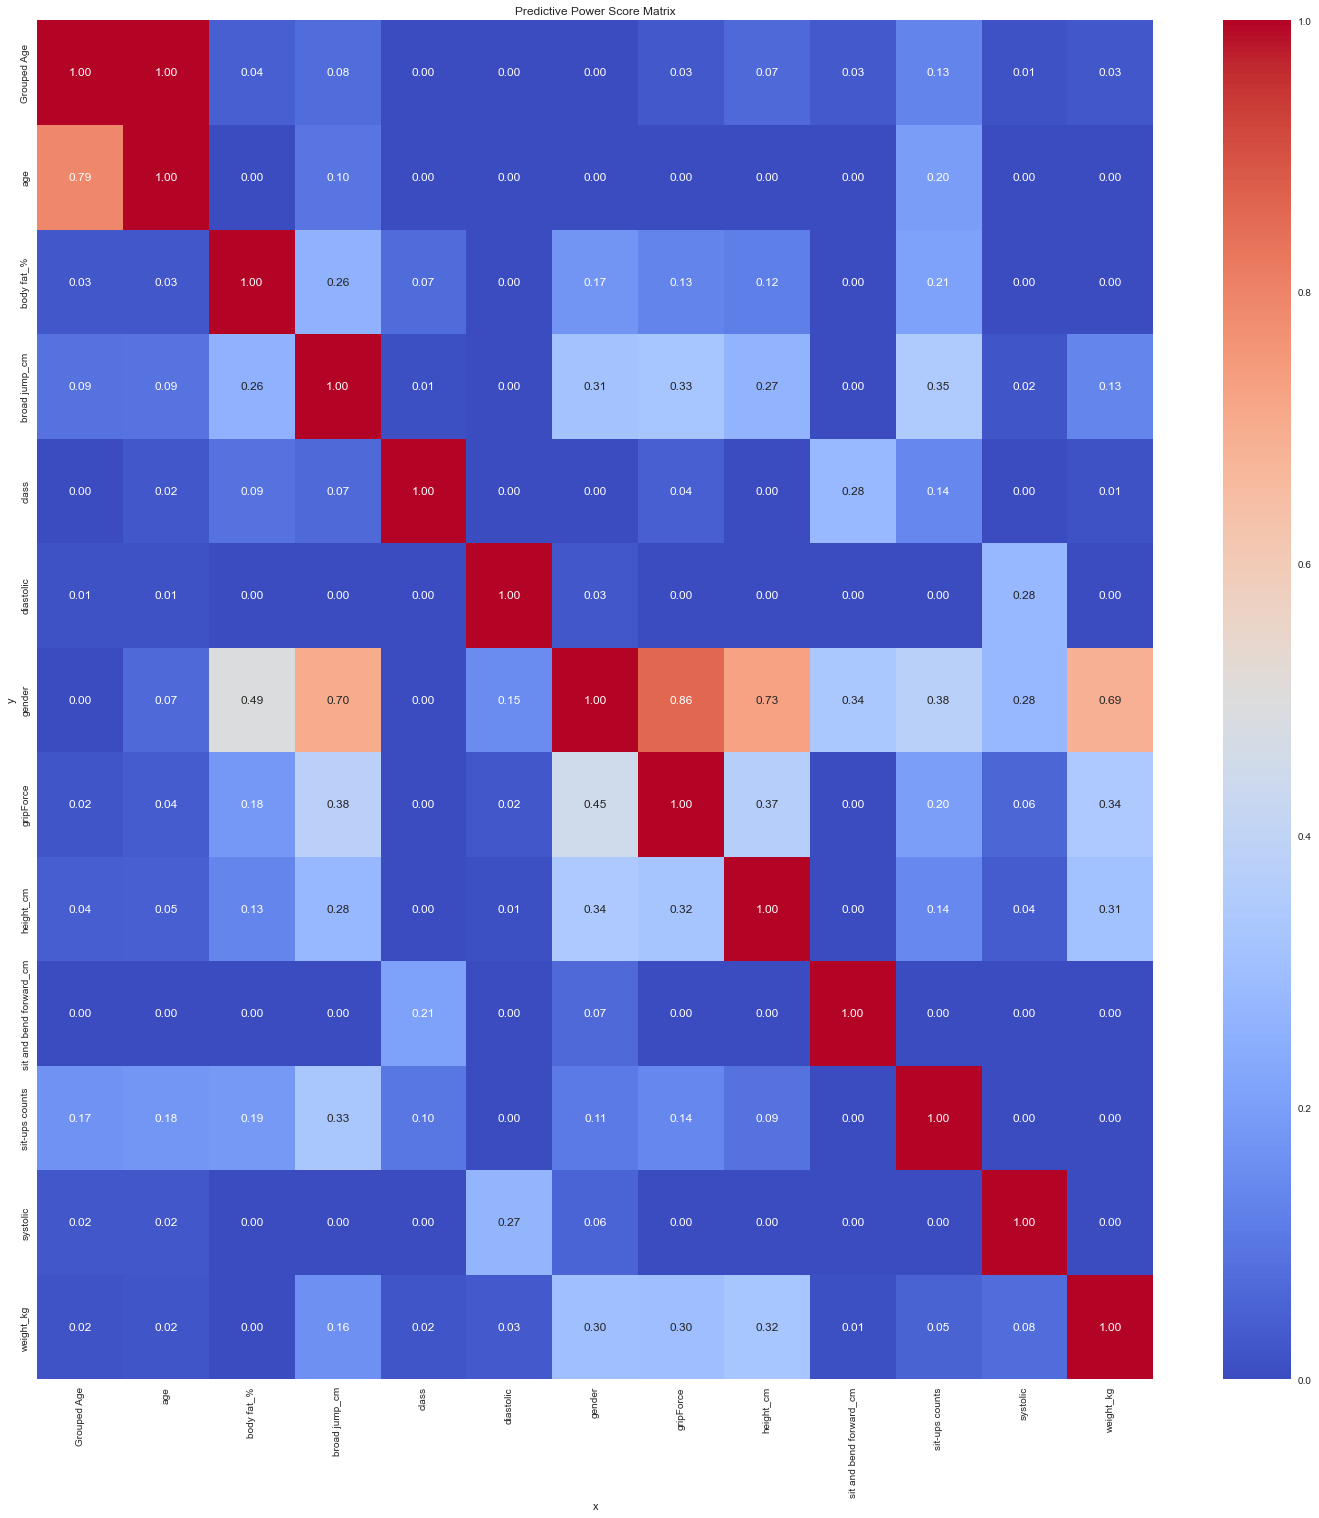

In [61]:
plt.figure(figsize=(25, 25))
matrix_df = pps.matrix(body_performance).pivot(columns='x', index='y',  values='ppscore')
sns.heatmap(matrix_df, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Predictive Power Score Matrix");